# Masked Face Detector
---
Masked and partially or fully unmasked face detector with application of:
* **pretrained PyTorch model** for face detection
* **Haar Cascade Classifiers** for eyes, mouths and noses detection
* **HOG Facial Landmarks** for jawline detection (lower border of face)
* **Human Skin Detector** for estimation of masked face percentage

In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from src.human_silhouette_detector import detect_human_silhouettes_and_faces
from src.haar_detector import detect_face_parts
from src.facial_landmarks_detector import detect_facial_landmarks, get_face_above_jaw
from src.human_skin_detector import detect_skin
from src.perc_calculation import calculate_masking_percentage, draw_roi

/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'MainModel.KitModel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original sou

In [2]:
def show_images(images, titles, suptitle='Images'):
    assert (len(images) == len(titles)), 'Lists of images and titles of images must have the same length!'
    
    fig, ax = plt.subplots(1, len(images), figsize=(15, 5))
    
    for i, (image, title) in enumerate(zip(images, titles)):
        ax[i].imshow(image)
        ax[i].set_title(title)
        ax[i].axis('off')
    
    fig.suptitle(suptitle)
    plt.tight_layout()
    plt.show()

## Silhouette and face detectors
---
PyTorch pretrained silhouette and face detection models.

In [3]:
image_unmasked = Image.open('images/unmasked_people1.jpg')
unmasked_faces_info, _, unmasked_faces_image = detect_human_silhouettes_and_faces(
    image_unmasked, highlight_neg=True)

image_masked = Image.open('images/masked_people2.jpg')
masked_faces_info, _, masked_faces_image = detect_human_silhouettes_and_faces(
    image_masked, highlight_neg=True)

/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/jakub/Doku

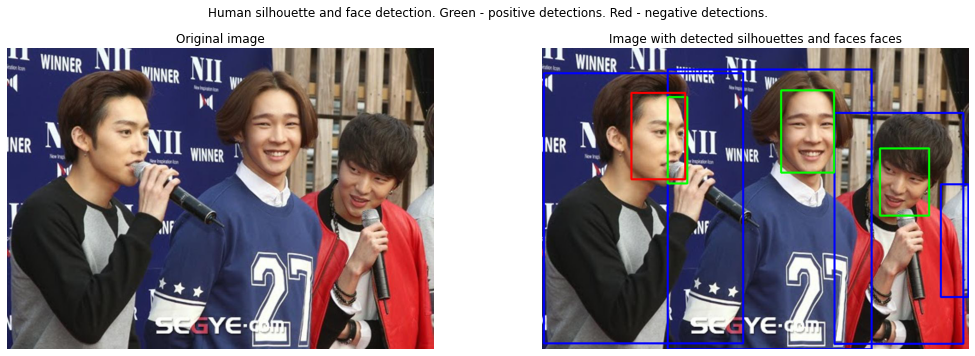

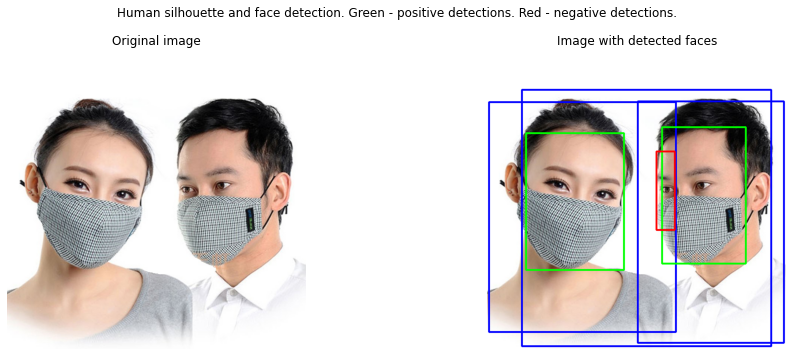

In [4]:
show_images([image_unmasked, unmasked_faces_image],
            ['Original image', 'Image with detected silhouettes and faces faces'],
            suptitle='Human silhouette and face detection. Green - positive detections. Red - negative detections.')

show_images([image_masked, masked_faces_image],
            ['Original image', 'Image with detected faces'],
            suptitle='Human silhouette and face detection. Green - positive detections. Red - negative detections.')

In [5]:
unmasked_faces_info, masked_faces_info

(array([[810, 240, 928, 401],
        [301, 117, 348, 324],
        [573, 101, 700, 298]]),
 array([[104, 222, 366, 588],
        [468, 206, 692, 571]]))

In [6]:
face_unmasked = image_unmasked.crop(tuple(unmasked_faces_info[2]))

face_masked = image_masked.crop(tuple(masked_faces_info[0]))

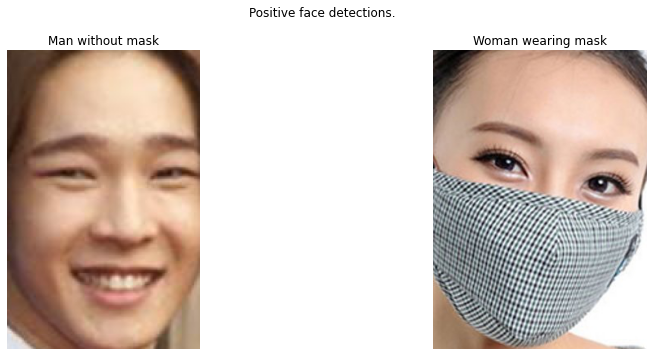

In [7]:
show_images([face_unmasked, face_masked], ['Man without mask', 'Woman wearing mask'],
            suptitle='Positive face detections.')

## Haar Cascade Classifiers

In [8]:
face_unmasked_parts_info, face_unmasked_parts = detect_face_parts(face_unmasked)

face_masked_parts_info, face_masked_parts = detect_face_parts(face_masked)

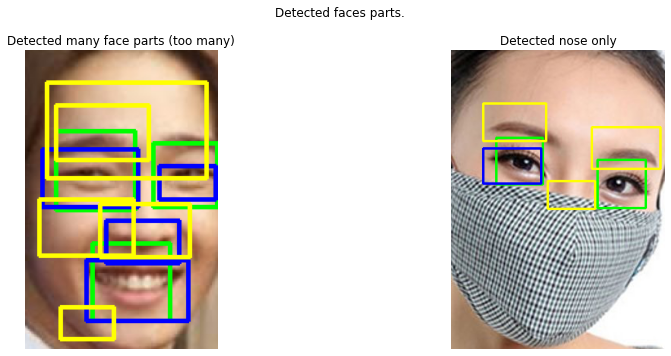

In [9]:
show_images([face_unmasked_parts, face_masked_parts], ['Detected many face parts (too many)', 'Detected nose only'], suptitle='Detected faces parts.')

In [10]:
face_unmasked_parts_info, face_masked_parts_info

({'eyes': [((20, 53), (72, 105)),
   ((84, 61), (126, 103)),
   ((44, 127), (95, 178))],
  'mouths': [((53, 112), (101, 140)),
   ((88, 76), (125, 98)),
   ((11, 65), (74, 103)),
   ((40, 138), (107, 178))],
  'noses': [((23, 169), (58, 190)),
   ((49, 101), (108, 136)),
   ((20, 36), (81, 72)),
   ((14, 21), (119, 84)),
   ((9, 98), (71, 135))]},
 {'eyes': [((179, 134), (238, 193)), ((55, 107), (112, 164))],
  'mouths': [((39, 120), (110, 163))],
  'noses': [((39, 65), (116, 111)),
   ((118, 160), (176, 194)),
   ((172, 94), (256, 145))]})

In [11]:
def extract_haar_cascade_features():
    # which values of detected regions are to pass on neural network
    pass

## HOG Facial Landmarks

In [12]:
face_unmasked_landmarks_info, face_unmasked_landmarks = detect_facial_landmarks(face_unmasked)

face_masked_landmarks_info, face_masked_landmarks = detect_facial_landmarks(face_masked)

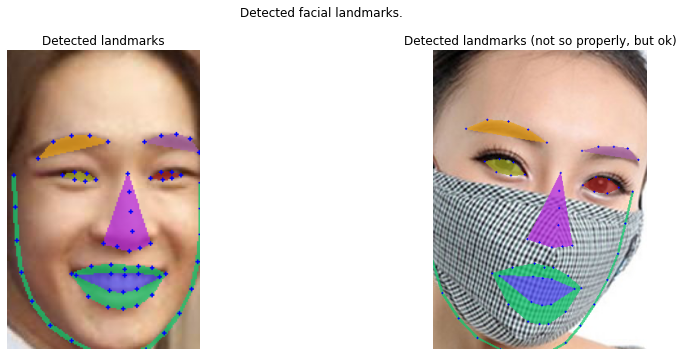

In [13]:
show_images([face_unmasked_landmarks, face_masked_landmarks],
            ['Detected landmarks', 'Detected landmarks (not so properly, but ok)'], suptitle='Detected facial landmarks.')

In [14]:
face_unmasked_landmarks_info['jaw'], face_masked_landmarks_info['jaw']

([(4, 82),
  (5, 103),
  (6, 125),
  (9, 146),
  (16, 165),
  (28, 181),
  (42, 191),
  (58, 199),
  (75, 199),
  (91, 197),
  (103, 186),
  (113, 173),
  (121, 157),
  (125, 139),
  (127, 121),
  (127, 104),
  (127, 87)],
 [(-4, 117),
  (-5, 163),
  (-6, 211),
  (-2, 255),
  (11, 297),
  (31, 328),
  (54, 352),
  (82, 366),
  (112, 371),
  (140, 371),
  (162, 358),
  (180, 337),
  (197, 311),
  (213, 281),
  (226, 249),
  (235, 212),
  (244, 173)])

In [15]:
face_unmasked_restr_roi, face_unmasked_restr_mask, face_unmasked_restr_face = get_face_above_jaw(
    face_unmasked, face_unmasked_landmarks_info['jaw'], draw_roi=True)

face_masked_restr_roi, face_masked_restr_mask, face_masked_restr_face = get_face_above_jaw(
    face_masked, face_masked_landmarks_info['jaw'], draw_roi=True)

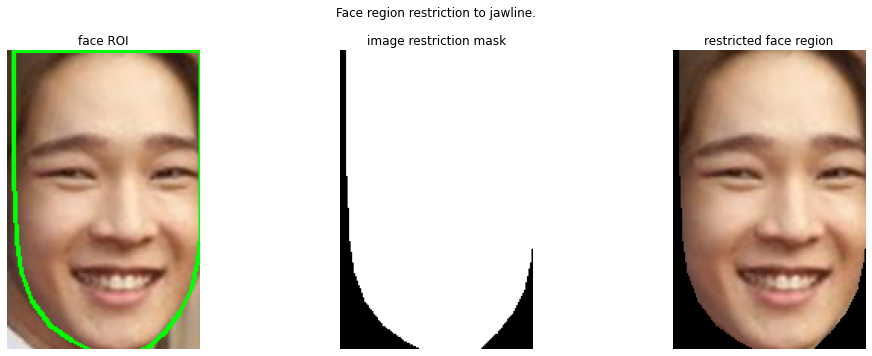

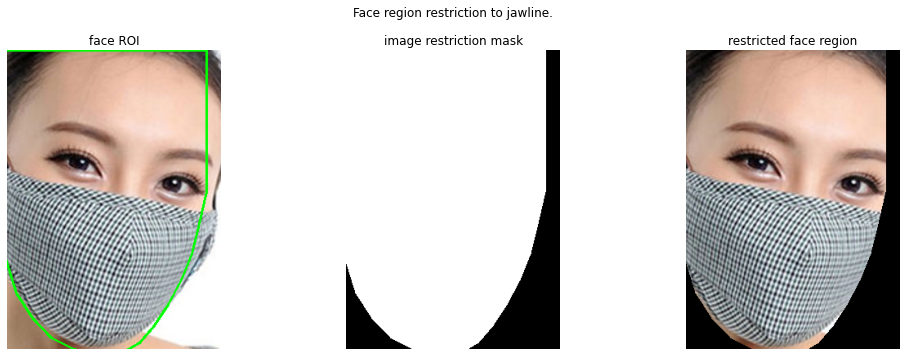

In [16]:
show_images([face_unmasked_restr_roi, face_unmasked_restr_mask, face_unmasked_restr_face],
            ['face ROI', 'image restriction mask', 'restricted face region'],
            suptitle='Face region restriction to jawline.')

show_images([face_masked_restr_roi, face_masked_restr_mask, face_masked_restr_face],
            ['face ROI', 'image restriction mask', 'restricted face region'],
            suptitle='Face region restriction to jawline.')

In [17]:
def extract_hog_landmarks_features():
    # which values of hog facial landmarks are to pass on neural network
    pass

## Human Skin Detection

In [18]:
_, face_unmasked_skin_mask, face_unmasked_skin = detect_skin(face_unmasked)

_, face_masked_skin_mask, face_masked_skin = detect_skin(face_masked)

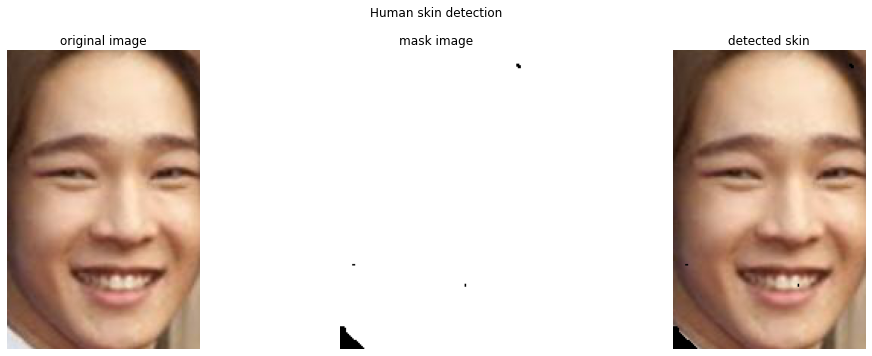

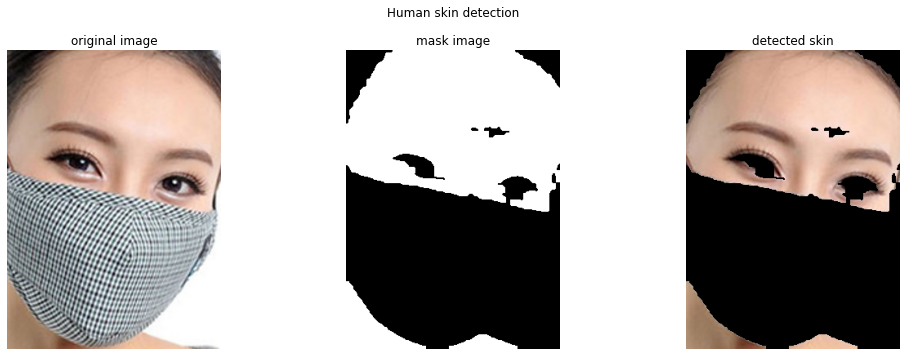

In [19]:
show_images([face_unmasked, face_unmasked_skin_mask, face_unmasked_skin],
            ['original image', 'mask image', 'detected skin'], suptitle='Human skin detection')

show_images([face_masked, face_masked_skin_mask, face_masked_skin],
            ['original image', 'mask image', 'detected skin'], suptitle='Human skin detection')

## Percentage of face masking calculation
---
In order to calculate the percentage of face masking it is necessary to:
1. Take the Haar Cascade detected face parts (true and false detections), which rectangles contain at least 80% of skin detected by Human Skin Detector.
2. Make areas marked by above regions white.
3. Perform bitwise "and" operation on masks for restricted face and detected skin.

Finish.

In [20]:
face_unmasked_perc, face_unmasked_final_mask, face_unmasked_final = calculate_masking_percentage(
    face_unmasked, face_unmasked_skin_mask, face_unmasked_restr_mask, face_unmasked_parts_info)

face_masked_perc, face_masked_final_mask, face_masked_final = calculate_masking_percentage(
    face_masked, face_masked_skin_mask, face_masked_restr_mask, face_masked_parts_info)

In [21]:
face_unmasked_perc, face_masked_perc

(0.0003587122231190065, 0.5149086843086097)

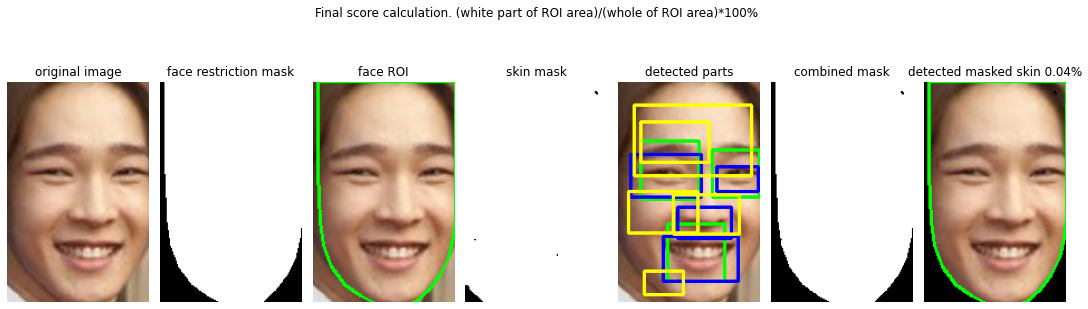

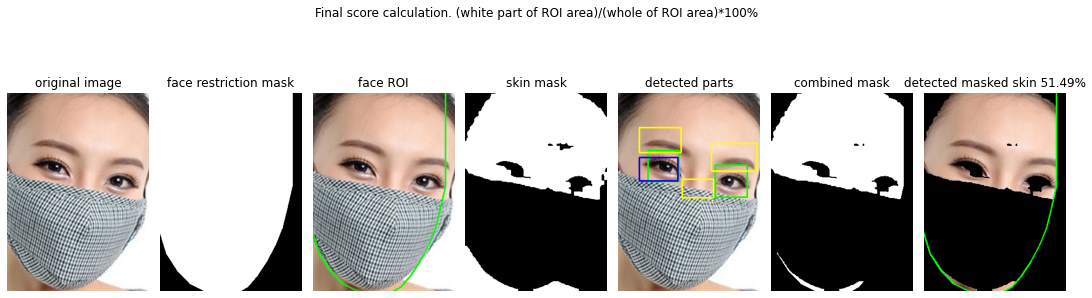

In [22]:
show_images([face_unmasked, face_unmasked_restr_mask, face_unmasked_restr_roi, face_unmasked_skin_mask,
             face_unmasked_parts, face_unmasked_final_mask,
             draw_roi(face_unmasked_final, face_unmasked_landmarks_info['jaw'])],
            ['original image', 'face restriction mask', 'face ROI', 'skin mask', 'detected parts',
             'combined mask', f'detected masked skin {str(np.round(face_unmasked_perc*100, 2))}%'],
            suptitle='Final score calculation. (white part of ROI area)/(whole of ROI area)*100%')

show_images([face_masked, face_masked_restr_mask, face_masked_restr_roi, face_masked_skin_mask,
             face_masked_parts, face_masked_final_mask,
             draw_roi(face_masked_final, face_masked_landmarks_info['jaw'])],
            ['original image', 'face restriction mask', 'face ROI', 'skin mask', 'detected parts',
             'combined mask', f'detected masked skin {str(np.round(face_masked_perc*100, 2))}%'],
            suptitle='Final score calculation. (white part of ROI area)/(whole of ROI area)*100%')

In [23]:
def extract_percentage_features():
    # pass masked and unmasked percentage on neural network
    pass